In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import geopandas
import matplotlib

In [2]:
os.getcwd()

'/Users/alvastrand/Documents/OU/Research/notebooks/calculate_arrival_date'

In [3]:
path = '/Users/alvastrand/Documents/OU/Research/data/'
os.chdir(path)

In [4]:
os.getcwd()

'/Users/alvastrand/Documents/OU/Research/data'

In [5]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [6]:
start_date = '0101'
end_date = '0731'
month = 'Apr'
year = '2020'
countries_states = 'US_states_east_Mississippi'

In [7]:
subdir = 'output/'
filename = 'obligate_aerial_insectivores_ebird_species_codes.csv'

df = pd.read_csv(subdir + filename)

print(len(df))

19


In [8]:
df.head(2)

,scientific_name,common_name,species_code,category,taxon_order,order,family,report_as
0,Antrostomus arizonae,Mexican Whip-poor-will,souwpw1,species,3533,Caprimulgiformes,Caprimulgidae,NaN
1,Antrostomus carolinensis,Chuck-will's-widow,chwwid,species,3510,Caprimulgiformes,Caprimulgidae,NaN


In [9]:
for i in range(len(df)):
      
    print(i, df['species_code'].iloc[i], df['common_name'].iloc[i])

0 souwpw1 Mexican Whip-poor-will
1 chwwid Chuck-will's-widow
2 bucnig Buff-collared Nightjar
3 whip-p1 Eastern Whip-poor-will
4 lesnig Lesser Nighthawk
5 comnig Common Nighthawk
6 compoo Common Poorwill
7 whtswi White-throated Swift
8 chiswi Chimney Swift
9 vauswi Vaux's Swift
10 blkswi Black Swift
11 barswa Barn Swallow
12 cavswa Cave Swallow
13 cliswa Cliff Swallow
14 purmar Purple Martin
15 banswa Bank Swallow
16 nrwswa Northern Rough-winged Swallow
17 treswa Tree Swallow
18 vigswa Violet-green Swallow


In [10]:
def name_of_function(species, df, arrival_day_field_name, df_grid_cells, predictor_variable, *args):
    
    if (arrival_day_field_name == 'mean_arrival_day') | (arrival_day_field_name == 't_mad'):
        
        r_squared = args[0]
        print('r_squared:', r_squared)
        
        # Filter
        
        df = df[df['r_squared'] >= r_squared]
        print('len(df):', len(df))
        
        print("len(df['grid_cell'].unique()):", len(df['grid_cell'].unique()))
        
    elif arrival_day_field_name == 'first_of_season_arrival_day':
        
        if args != ():
            
            random_state = args[0]
        
    if len(df) == 0:
        
        df_r = pd.DataFrame()
        df_r_significant = pd.DataFrame()
        
    else:
        
        df_cnt = df[['grid_cell', 'year']].groupby(['grid_cell']).count()
        df_cnt = df_cnt.reset_index()
        df_cnt = df_cnt.rename(columns={'year': 'nb_years'})
        print('len(df_cnt):', len(df_cnt))
        
        cnt_years = 5
                
        # Filter

        list_grid_cells = list(df_cnt[df_cnt['nb_years'] >= cnt_years]['grid_cell'])
        
        print('len(list_grid_cells):', len(list_grid_cells))
        
        if len(list_grid_cells) == 0:
            
            df_r = pd.DataFrame()
            df_r_significant = pd.DataFrame()
            
        else:
            
            # Filter

            df = df[df['grid_cell'].isin(list_grid_cells)]
            print('len(df):', len(df))

            list_means_days = []
            list_std_days = []
#             list_days = []
#             list_days_excluded = []
            list_slopes_ols = []
            list_intercepts_ols = []
            list_r_squared_ols = []
            list_p_values_ols = []
            
#             list_r_values = []
#             list_std_err = []

            for i in range(len(list_grid_cells)):
        
#                 print('list_grid_cells[i] =', list_grid_cells[i])
                
                df_subset = df[df['grid_cell'] == list_grid_cells[i]]
                model_ols = smf.ols(formula=arrival_day_field_name + ' ~ ' + predictor_variable, data=df_subset)
                res_ols = model_ols.fit()
                
#                 if (res_ols.params[1] > 5):
                
#                 print(res_ols.summary())

#                 linregress = scipy.stats.linregress(df_subset[predictor_variable], 
#                                                     df_subset[arrival_day_field_name])
#                 print(linregress)

#####

#                 if (species == 'barswa') & (np.absolute(res_ols.params.year) > 2):

#                     print(species, np.absolute(res_ols.params.year))

#     #                 plt.figure(figsize=(12.0, 4.0))
#                     ax = df_subset.plot(x='year', y=arrival_day_field_name, kind='scatter')
#     #                 plt.scatter(df_subset['year'], df_subset[arrival_day_field_name])
#                     abline_plot(model_results=res_ols, ax=ax)

#####

#                 # plt.figure(figsize=(12.0, 4.0))

#                 ax = df_subset.plot(x=predictor_variable, y=arrival_day_field_name, kind='scatter')

#                 # plt.scatter(df_subset[predictor_variable], df_subset[arrival_day_field_name])

#                 abline_plot(model_results=res_ols, ax=ax)

#                 if (arrival_day_field_name == 'first_of_season_arrival_day') & (args != ()):

#                         plt.title('Species code = ' + species + ', grid cell = ' + str(list_grid_cells[i]) + \
#                                   ', random state = ' + str(random_state))

#                 else:

#                         plt.title('Species code = ' + species + ', grid cell = ' + str(list_grid_cells[i]))

#                 plt.show()

                mean_day = df_subset[arrival_day_field_name].mean()
                list_means_days.append(mean_day)
                std_day = df_subset[arrival_day_field_name].std()
                list_std_days.append(std_day)

#                 df_subset['day_excluded'] = np.where(
#                     (df_subset[arrival_day_field_name] > mean_day + 2*std_day) | 
#                     (df_subset[arrival_day_field_name] < mean_day - 2*std_day), 1, 0)
#                 list_days.append(df_subset[[arrival_day_field_name, 'day_excluded']])

#                 if 1 in list(df_subset['day_excluded']):
#                     list_days_excluded.append(1)
#                 else:
#                     list_days_excluded.append(0)

                list_slopes_ols.append(res_ols.params[1])
                list_intercepts_ols.append(res_ols.params[0])
                list_r_squared_ols.append(res_ols.rsquared)
                list_p_values_ols.append(res_ols.pvalues[1])

#                 print(dir(res_ols))

            df_r = pd.DataFrame(data={'grid_cell': list_grid_cells, 'slope_ols': list_slopes_ols, 
                                      'intercept_ols': list_intercepts_ols, 'r_squared_ols': list_r_squared_ols, 
                                      'p_value_ols': list_p_values_ols, 'mean_day': list_means_days, 
                                      'std_day': list_std_days})
            
            print('len(df_r) =', len(df_r))

#             df_r = pd.DataFrame(data={'grid_cell': list_grid_cells, 'slope_ols': list_slopes_ols, 
#                                       'intercept_ols': list_intercepts_ols, 'mean_day': list_means_days, 
#                                       'std_day': list_std_days, 'day_excluded': list_days_excluded})

            df_r = df_r.merge(df_grid_cells, on='grid_cell')
            print('len(df_r) =', len(df_r))
            
#             print("len(df_r[df_r['p_value_ols'] <= 0.05]) =", len(df_r[df_r['p_value_ols'] <= 0.05]))
            
            df_r_significant = df_r[df_r['p_value_ols'] <= 0.05]
            print('len(df_r_significant) =', len(df_r_significant))
            
            # Filter

#             df_r = df_r[df_r['day_excluded'] == 0]
#             print('len(df_r):', len(df_r))

            df_r['lat_band'] = np.nan

            list_lat_band_boundaries = range(20, 55, 5)

            for i in range(len(list_lat_band_boundaries)):

                if i == len(list_lat_band_boundaries) - 1:
                    bounding_lat = list_lat_band_boundaries[i] + 5
                else:
                    bounding_lat = list_lat_band_boundaries[i+1]

                df_r.loc[(df_r['min_lat'] > list_lat_band_boundaries[i]) & 
                     (df_r['min_lat'] <= bounding_lat), 'lat_band'] = bounding_lat

            df_r['lat_band'] = df_r['lat_band'].astype(int)

            list_lat_bands = list(df_r['lat_band'].unique())

#             for i in range(len(list_lat_bands)):

#                 print('list_lat_bands[i]:', list_lat_bands[i])

#                 df_subset = df_r[df_r['lat_band'] == list_lat_bands[i]]

#                 print("df_subset['slope_ols'].mean():", df_subset['slope_ols'].mean())
#                 print("df_subset['slope_ols'].median():", df_subset['slope_ols'].median())
#                 print(df_subset['slope_ols'].std())

#             print("scipy.stats.linregress(df_r['min_lat'], df_r['slope_ols']):", 
#                   scipy.stats.linregress(df_r['min_lat'], df_r['slope_ols']))
#             print("scipy.stats.linregress(df_r['max_lat'], df_r['slope_ols']):", 
#                   scipy.stats.linregress(df_r['max_lat'], df_r['slope_ols']))
#             print("scipy.stats.linregress(df_r['min_lon'], df_r['slope_ols']):", 
#                   scipy.stats.linregress(df_r['min_lon'], df_r['slope_ols']))
#             print("scipy.stats.linregress(df_r['max_lon'], df_r['slope_ols']):", 
#                   scipy.stats.linregress(df_r['max_lon'], df_r['slope_ols']))

#             plt.scatter(df_r['min_lat'], df_r['slope_ols'])
#             plt.show()

#             plt.scatter(df_r['max_lat'], df_r['slope_ols'])
#             plt.show()

#             plt.scatter(df_r['min_lon'], df_r['slope_ols'])
#             plt.show()

#             plt.scatter(df_r['max_lon'], df_r['slope_ols'])
#             plt.show()

            
            assert(len(df_r['grid_cell'].unique()) == len(df_r))


            # df_days_year = df[['grid_cell', 'year', arrival_day_field_name]].merge(df_r, on=['grid_cell'])

            # plt.scatter(df_days_year['year'], df_days_year[arrival_day_field_name])
            # plt.xlabel('Year')
            # plt.show()

#             print("scipy.stats.linregress(df_days_year['year'], df_days_year[arrival_day_field_name]):", 
#                   scipy.stats.linregress(df_days_year['year'], df_days_year[arrival_day_field_name]))

            df_r['mean_lat'] = (df_r['min_lat'] + df_r['max_lat'])/2
            df_r['mean_lon'] = (df_r['min_lon'] + df_r['max_lon'])/2

            # df_r['abs_slope'] = df_r['slope_ols'].abs()*100

#             df_g = geopandas.GeoDataFrame(
#                 df_r, geometry=geopandas.points_from_xy(df_r['mean_lon'], df_r['mean_lat']))

#             print("df_g['slope_ols'].min():", df_g['slope_ols'].min())
#             print("np.floor(df_g['slope_ols'].min()):", np.floor(df_g['slope_ols'].min()))
#             print("df_g['slope_ols'].max():", df_g['slope_ols'].max())
#             print("np.ceil(df_g['slope_ols'].max()):", np.ceil(df_g['slope_ols'].max()))

#             abs_floor_min_slope = np.absolute(np.floor(df_g['slope_ols'].min()))
#             abs_ceil_max_slope = np.absolute(np.ceil(df_g['slope_ols'].max()))

#             print('abs_floor_min_slope:', abs_floor_min_slope)
#             print('abs_ceil_max_slope:', abs_ceil_max_slope)

#             greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])

#             v_min = -greatest_abs
#             v_max = greatest_abs
            
#             norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
            
#             matplotlib.rcParams['font.size'] = 15
            
#             world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
            
#             ax = world[world['iso_a3'] == 'USA'].plot(
#                 color='white', edgecolor='black', figsize=(20.0, 15.0))

#             sc = plt.scatter('mean_lon', 'mean_lat', s=250, c='slope_ols', alpha=0.5, cmap='RdBu_r', data=df_g, 
#                              norm=norm, edgecolor='black', marker='o')
#             # sc = plt.scatter(
#             #     'mean_lon', 'mean_lat', s='abs_slope', c='slope_ols', alpha=0.5, cmap='RdBu', data=df_g)
#             # plt.colorbar(sc, cax=ax)
#             plt.colorbar(sc, fraction=0.0241, pad=0.015)
#             plt.xlabel('Longitude')
#             plt.ylabel('Latitude')
#             plt.title(
#                 'Slopes of mean arrival date as a function of time shown as bubbles on a map of the United \
#                 States')
#             plt.show()

            # world[world['iso_a3'] == 'USA']

    return df_r, df_r_significant

In [11]:
def get_dataframes(species, df, arrival_day_field_name, df_grid_cells, r_squared, list_df_mean, 
                   list_df_mean_significant, predictor_variable):
    
    df_r_mean, df_r_mean_significant = name_of_function(species, df, arrival_day_field_name, df_grid_cells, 
                                                        predictor_variable, r_squared)
    
    
    if len(df_r_mean) == 0:
        
        list_df_mean.append(pd.DataFrame())
#         list_df_r_comp.append(pd.DataFrame())
        
    else:
        
#         df_r_mean = df_r_mean.rename(columns={'slope': 'slope_mean'})
        df_r_mean['species_code'] = species

#         df_r_comp = df_r_first_of[['grid_cell', 'slope_first_of_season', 'species_code']].merge(
#             df_r_mean[['grid_cell', 'slope_mean', 'species_code']], on=['grid_cell', 'species_code'])

        print('len(df_r_mean):', len(df_r_mean))
#         print('len(df_r_comp):', len(df_r_comp))
        
#         print("len(df_r_comp['slope_mean']):", len(df_r_comp['slope_mean']))

#         if len(df_r_comp) > 0:
#             df_r_comp.plot('slope_mean', 'slope_first_of_season', kind='scatter')
#             plt.show()

        list_df_mean.append(df_r_mean)
#         list_df_r_comp.append(df_r_comp)


    if len(df_r_mean_significant) == 0:
        
        list_df_mean_significant.append(pd.DataFrame())
        
    else:
        
        df_r_mean_significant['species_code'] = species

        print('len(df_r_mean_significant):', len(df_r_mean_significant))        

        list_df_mean_significant.append(df_r_mean_significant)
        
        
    return list_df_mean, list_df_mean_significant

#     return list_df_mean, list_df_r_comp

In [12]:
def main_function(species, start_date, end_date, start_year, end_year, month, year, predictor_variable, *args):
    
    subdir = 'eBird/ebd_output/'

    if args != ():

        countries_states = args[0]
        
        filename_first_of_season = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + \
        end_date + '_complete_zerofilled_grid_cells_proportions_first_of_season_rel' + month + '-' + year + \
        '_v2.csv'
        print('filename_first_of_season =', filename_first_of_season)
        
        filename_mean = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + end_date + \
        '_complete_zerofilled_grid_cells_proportions_mean_rel' + month + '-' + year + '.csv'
        print('filename_mean =', filename_mean)
        
        filename_grid_cell_ids = 'ebd_' + countries_states + '_' + start_date + '_' + end_date + \
        '_complete_zerofilled_grid_cell_ids_rel' + month + '-' + year + '.csv'
        print('filename_grid_cell_ids =', filename_grid_cell_ids)
        
#####

        # Sampling

        if len(args) > 1:
        
            sampled = args[1]
            
#             grid_cell = 117
#             grid_cell = 147
#             grid_cell = 151
        
            if sampled == 1:

                string = 'sampled'

                random_state = args[2]

                # Incorrect!

                filename_first_of_season = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + \
                end_date + '_' + actual_start_date + '_' + actual_end_date + \
                '_complete_zerofilled_grid_cells_proportions_first_of_season_' + str(start_year) + '_' + \
                str(end_year) + '_' + string + '_' + str(random_state) + '_rel' + month + '-' + year + '.csv'
                print('filename_first_of_season =', filename_first_of_season)

#                 filename_first_of_season = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + \
#                 end_date + '_complete_zerofilled_grid_cells_proportions_first_of_season_' + str(start_year) + \
#                 '_' + str(end_year) + '_' + string + '_' + str(random_state) + '_rel' + month + '-' + year + \
#                 '.csv'
#                 print('filename_first_of_season =', filename_first_of_season)

                # A single grid cell

#                 filename_mean = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + end_date + \
#                 '_complete_zerofilled_grid_cell_' + str(grid_cell) + '_proportions_mean_' + str(start_year) + \
#                 '_' + str(end_year) + '_' + string + '_' + str(random_state) + '_rel' + month + '-' + year + \
#                 '.csv'
#                 print('filename_mean =', filename_mean)

            elif sampled == 0:

                string = 'not_sampled'

                # Incorrect!

                filename_first_of_season = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + \
                end_date + '_' + actual_start_date + '_' + actual_end_date + \
                '_complete_zerofilled_grid_cells_proportions_first_of_season_' + str(start_year) + '_' + \
                str(end_year) + '_' + string + '_rel' + month + '-' + year + '.csv'
                print('filename_first_of_season =', filename_first_of_season)

#                 filename_first_of_season = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + \
#                 end_date + '_complete_zerofilled_grid_cells_proportions_first_of_season_' + str(start_year) + \
#                 '_' + str(end_year) + '_' + string + '_rel' + month + '-' + year + '.csv'
#                 print('filename_first_of_season =', filename_first_of_season)

                # A single grid cell
    
#                 filename_mean = 'ebd_' + countries_states + '_' + species + '_' + start_date + '_' + end_date + \
#                 '_complete_zerofilled_grid_cell_' + str(grid_cell) + '_proportions_mean_' + str(start_year) + \
#                 '_' + str(end_year) + '_' + string + '_rel' + month + '-' + year + '.csv'
#                 print('filename_mean =', filename_mean)

#####


    # Mean arrival day

    df = pd.read_csv(subdir + filename_mean)
    df['mad'] = pd.to_datetime(df['mad'])
#     df['mean_arrival_date'] = pd.to_datetime(df['mean_arrival_date'])
    print('len(df):', len(df))
    print("len(df['grid_cell'].unique()):", len(df['grid_cell'].unique()))
    
    # Filter
    
    df = df[df['year'] >= 2002]
    print('len(df):', len(df))
    print("len(df['grid_cell'].unique()):", len(df['grid_cell'].unique()))
    
    # Filter
    
    df = df[df['year'] != 2020]
    print('len(df):', len(df))
    print("len(df['grid_cell'].unique()):", len(df['grid_cell'].unique()))
    
    
    # First-of-season arrival day
    
    df_first_of = pd.read_csv(subdir + filename_first_of_season)
    df_first_of['first_of_season_arrival_date'] = pd.to_datetime(df_first_of['first_of_season_arrival_date'])
    df_first_of['first_of_season_arrival_day'] = df_first_of['first_of_season_arrival_day'].astype('int')
    print('len(df_first_of):', len(df_first_of))

    
    df_grid_cells = pd.read_csv(subdir + filename_grid_cell_ids)
    print('len(df_grid_cells):', len(df_grid_cells))
    # 182?
    
    
    print("len(df_first_of['grid_cell'].unique()):", len(df_first_of['grid_cell'].unique()))
    
    
    if predictor_variable == 'air_temp_degrees_celsius':
        
        start_year_narr = 2002
        end_year_narr = 2019

        subdir = 'output/'

        filename = 'ncep_narr_air_2m_ebd_' + countries_states + '_' + start_date + '_' + end_date + \
        '_complete_zerofilled_grid_cell_ids_' + str(start_year_narr) + '_' + str(end_year_narr) + '_rel' + \
        month + '-' + year + '.csv'
        
        df_grid_cells_years_air_temps = pd.read_csv(subdir + filename)

        print(len(df_grid_cells_years_air_temps))
        
        df_first_of = df_first_of.merge(
            df_grid_cells_years_air_temps[['grid_cell', 'year', 'air_temp_degrees_celsius']], 
            on=['grid_cell', 'year'])
        
        print('len(df_first_of) =', len(df_first_of))
        
        df = df.merge(df_grid_cells_years_air_temps[['grid_cell', 'year', 'air_temp_degrees_celsius']], 
                      on=['grid_cell', 'year'])
        
        print('len(df) =', len(df))


#     df_comp = df.merge(df_first_of, on=['grid_cell', 'year'])

#     df_comp.plot('t_mad', 'first_of_season_arrival_day', kind='scatter')
#     plt.show()

#     print("df['r_squared'].mean():", df['r_squared'].mean())
#     print("df['r_squared'].std():", df['r_squared'].std())
#     print("df['r_squared'].median():", df['r_squared'].median())
#     print("df['r_squared'].min():", df['r_squared'].min())
#     print("df['r_squared'].max():", df['r_squared'].max())


    arrival_day_field_name = 'first_of_season_arrival_day'
    
    df_r_first_of, df_r_first_of_significant = name_of_function(species, df_first_of, arrival_day_field_name, 
                                                                df_grid_cells, predictor_variable)


#####

    # Sampling
    
#     if sampled == 1:
            
#         df_r_first_of = name_of_function(species, df_first_of, arrival_day_field_name, df_grid_cells, 
#                                          predictor_variable, random_state)
    
#     elif sampled == 0:
        
#         df_r_first_of = name_of_function(species, df_first_of, arrival_day_field_name, df_grid_cells, 
#                                          predictor_variable)

#####


    df_r_first_of = df_r_first_of.rename(columns={'slope_ols': 'slope_first_of_season_ols'})
    df_r_first_of['species_code'] = species
    print('len(df_r_first_of):', len(df_r_first_of))
    
    df_r_first_of_significant = df_r_first_of_significant.rename(
        columns={'slope_ols': 'slope_first_of_season_ols'})
    df_r_first_of_significant['species_code'] = species
    print('len(df_r_first_of_significant):', len(df_r_first_of_significant))
    
    
    # Mean arrival day

    list_df_r_mean = []
    list_df_r_mean_significant = []
#     list_df_r_comp = []
    
#     arrival_day_field_name = 'mean_arrival_day'
    arrival_day_field_name = 't_mad'

    r_squared = 0.1
    print('r_squared:', r_squared)
    
    list_df_r_mean, list_df_r_mean_significant = get_dataframes(
        species, df, arrival_day_field_name, df_grid_cells, r_squared, list_df_r_mean, 
        list_df_r_mean_significant, predictor_variable)
    
    r_squared = 0.5
    print('r_squared:', r_squared)
    
    list_df_r_mean, list_df_r_mean_significant = get_dataframes(
        species, df, arrival_day_field_name, df_grid_cells, r_squared, list_df_r_mean, 
        list_df_r_mean_significant, predictor_variable)

#     r_squared = 0.7
    r_squared = 0.8
    print('r_squared:', r_squared)
    
    list_df_r_mean, list_df_r_mean_significant = get_dataframes(
        species, df, arrival_day_field_name, df_grid_cells, r_squared, list_df_r_mean, 
        list_df_r_mean_significant, predictor_variable)


    return df, df_first_of, df_grid_cells, df_r_first_of, \
df_r_first_of_significant, list_df_r_mean, list_df_r_mean_significant

#     return df, df_first_of, df_grid_cells, df_grid_cells_years_air_temps, df_r_first_of, \
# df_r_first_of_significant, list_df_r_mean, list_df_r_mean_significant

# list_df_r_comp

In [13]:
# species = 'treswa'
# # species = 'barswa'
# print(species)

# # first_year = 2002
# first_year = 2003

# # start_year = '2002'

# # start_year = '2015'
# # start_year = '2014'

# end_year = 2019

# actual_start_date = '0101'
# actual_end_date = '0630'

# sampled = 1

# random_state = 1

# # df_first_of_species = pd.DataFrame()

# # df_mean_min_r_squared_species = pd.DataFrame()
# # df_mean_mean_r_squared_species = pd.DataFrame()

# # df_mean_std_mean_r_squared_species = pd.DataFrame()

###

# # df_mean, df_grid_cells, list_df_r_mean = main_function(
# #     species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states, random_state)

            
# # if len(list_df_r_mean[0]) > 0:

# #     df_mean_min_r_squared_species = df_mean_min_r_squared_species.append(list_df_r_mean[0])

# # if len(list_df_r_mean[1]) > 0:

# #     df_mean_mean_r_squared_species = df_mean_mean_r_squared_species.append(list_df_r_mean[1])

# # if len(list_df_r_mean[2]) > 0:

# #     df_mean_std_mean_r_squared_species = df_mean_std_mean_r_squared_species.append(list_df_r_mean[2])


# # if len(list_df_r_mean[0]) > 0:

# #     df_mean_std_mean_r_squared_species = df_mean_std_mean_r_squared_species.append(list_df_r_mean[0])


# df_r_first_of_sampled_years = pd.DataFrame()

# for start_year in range(first_year, end_year + 1):
# # for start_year in range(first_year, first_year + 2):

#     # start_year = 2003

#     start_year = str(start_year)
#     print('start_year =', start_year)

###

#     df_first_of_sampled, df_grid_cells_sampled, df_r_first_of_sampled = main_function(
#         species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states, 
#         random_state)

#     df_first_of_sampled['first_year'] = start_year
#     df_r_first_of_sampled['first_year'] = start_year

#     df_r_first_of_sampled_years = df_r_first_of_sampled_years.append(df_r_first_of_sampled)

In [14]:
# sampled = 0

# # df_first_of_species = pd.DataFrame()

# # df_mean_std_mean_r_squared_species_not_sampled = pd.DataFrame()

###

# # df_mean_not_sampled, df_grid_cells_not_sampled, list_df_r_mean_not_sampled = main_function(
# #     species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states, random_state)

# # if len(list_df_r_mean_not_sampled[0]) > 0:

# #     df_mean_std_mean_r_squared_species_not_sampled = df_mean_std_mean_r_squared_species_not_sampled.append(
# #         list_df_r_mean_not_sampled[0])


# df_r_first_of_not_sampled_years = pd.DataFrame()

# for start_year in range(first_year, end_year + 1):
# # for start_year in range(first_year, first_year + 2):

#     # start_year = 2003

#     start_year = str(start_year)
#     print('start_year =', start_year)

###
    
#     df_first_of_not_sampled, df_grid_cells_not_sampled, df_r_first_of_not_sampled = main_function(
#         species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states)

#     df_first_of_not_sampled['first_year'] = start_year
#     df_r_first_of_not_sampled['first_year'] = start_year

#     df_r_first_of_not_sampled_years = df_r_first_of_not_sampled_years.append(df_r_first_of_not_sampled)

In [15]:
# df_first_of_sampled.head(2)

In [16]:
# df_r_first_of_sampled.head(2)

In [17]:
# df_r_first_of_sampled_years.head(2)

In [18]:
# df_first_of_not_sampled.head(2)

In [19]:
# df_r_first_of_not_sampled.head(2)

In [20]:
# df_r_first_of_not_sampled_years.head(2)

In [21]:
# df_r_first_of_sampled_years = df_r_first_of_sampled_years.rename(
#     columns={'slope_first_of_season_ols': 'slope_first_of_season_ols_sampled', 
#              'intercept_ols': 'intercept_ols_sampled', 'mean_day': 'mean_day_sampled', 
#              'std_day': 'std_day_sampled'})

# df_r_first_of_not_sampled_years = df_r_first_of_not_sampled_years.rename(
#     columns={'slope_first_of_season_ols': 'slope_first_of_season_ols_not_sampled', 
#              'intercept_ols': 'intercept_ols_not_sampled', 'mean_day': 'mean_day_not_sampled', 
#              'std_day': 'std_day_not_sampled'})

# df_r_first_of_sampled_not_sampled_years = df_r_first_of_not_sampled_years.merge(
#     df_r_first_of_sampled_years, on=['grid_cell', 'min_lat', 'max_lat', 'min_lon', 'max_lon', 'lat_band',
#                                      'mean_lat', 'mean_lon', 'species_code', 'first_year'])

In [22]:
# df_r_first_of_sampled_not_sampled_years

In [23]:
# for start_year in range(first_year, end_year + 1):
# # for start_year in range(first_year, first_year + 2):
    
#     print('start_year =', start_year)
    
#     df_r_first_of_sampled_not_sampled_years[
#         df_r_first_of_sampled_not_sampled_years['first_year'] == str(start_year)].plot(
#         'slope_first_of_season_ols_not_sampled', 'slope_first_of_season_ols_sampled', kind='scatter')
#     plt.show()

In [24]:
start_year = '2002'
end_year = '2019'

predictor_variable = 'year'
# predictor_variable = 'air_temp_degrees_celsius'

# sampled = 1

# random_state = 1

#####

# Test

# species = 'treswa'

# df_mean, df_first_of, df_grid_cells, df_r_first_of, df_r_first_of_significant, \
# list_df_r_mean, list_df_r_mean_significant = main_function(
#     species, start_date, end_date, start_year, end_year, month, year, predictor_variable, countries_states)

# df_mean, df_first_of, df_grid_cells, df_grid_cells_years_air_temps, df_r_first_of, df_r_first_of_significant, \
# list_df_r_mean, list_df_r_mean_significant = main_function(
#     species, start_date, end_date, start_year, end_year, month, year, predictor_variable, countries_states)

#####

df_first_of_species = pd.DataFrame()
df_mean_min_r_squared_species = pd.DataFrame()
df_mean_mean_r_squared_species = pd.DataFrame()
df_mean_std_mean_r_squared_species = pd.DataFrame()

species_cnt = 0

# For each species

for i in range(len(df)):
    
    print(i)
  
    species = df['species_code'].iloc[i]
    print(species)
    
    if ((species == 'souwpw1') | (species == 'bucnig') | (species == 'compoo') | (species == 'whtswi') | 
        (species == "blkswi") | (species == 'vigswa')):
        continue
    
    df_mean, df_first_of, df_grid_cells, df_r_first_of, \
    df_r_first_of_significant, list_df_r_mean, list_df_r_mean_significant = main_function(
        species, start_date, end_date, start_year, end_year, month, year, predictor_variable, countries_states)
    
#     df_mean, df_first_of, df_grid_cells, df_grid_cells_years_air_temps, df_r_first_of, \
#     df_r_first_of_significant, list_df_r_mean, list_df_r_mean_significant = main_function(
#         species, start_date, end_date, start_year, end_year, month, year, predictor_variable, countries_states)

    
    # Sampling
    
#     df_mean, df_grid_cells, list_df_r_mean = main_function(
#         species, start_date, end_date, start_year, end_year, month, year, predictor_variable, 
#         countries_states, sampled, random_state)


    # list_df_r_comp!
    
#     df_mean, df_first_of, df_grid_cells, df_grid_cells_years_air_temps, df_r_first_of, \
#     df_r_first_of_significant, list_df_r_mean, list_df_r_mean_significant, list_df_r_comp = main_function(
#         species, start_date, end_date, start_year, end_year, month, year, predictor_variable, countries_states)

    
    if len(df_r_first_of) > 0:
        
        df_first_of_species = df_first_of_species.append(df_r_first_of)
            
    if len(list_df_r_mean[0]) > 0:

        df_mean_min_r_squared_species = df_mean_min_r_squared_species.append(list_df_r_mean[0])
            
    if len(list_df_r_mean[1]) > 0:

        df_mean_mean_r_squared_species = df_mean_mean_r_squared_species.append(list_df_r_mean[1])
            
    if len(list_df_r_mean[2]) > 0:

        df_mean_std_mean_r_squared_species = df_mean_std_mean_r_squared_species.append(list_df_r_mean[2])


#     if len(list_df_r_mean[0]) > 0:

#         df_mean_std_mean_r_squared_species = df_mean_std_mean_r_squared_species.append(list_df_r_mean[0])

    
    species_cnt += 1

print(species_cnt)

0
souwpw1
1
chwwid
filename_first_of_season = ebd_US_states_east_Mississippi_chwwid_0101_0731_complete_zerofilled_grid_cells_proportions_first_of_season_relApr-2020_v2.csv
filename_mean = ebd_US_states_east_Mississippi_chwwid_0101_0731_complete_zerofilled_grid_cells_proportions_mean_relApr-2020.csv
filename_grid_cell_ids = ebd_US_states_east_Mississippi_0101_0731_complete_zerofilled_grid_cell_ids_relApr-2020.csv
len(df): 290
len(df['grid_cell'].unique()): 50
len(df): 288
len(df['grid_cell'].unique()): 50
len(df): 273
len(df['grid_cell'].unique()): 50
len(df_first_of): 299
len(df_grid_cells): 182
len(df_first_of['grid_cell'].unique()): 51
len(df_cnt): 51
len(list_grid_cells): 34
len(df): 269
len(df_r) = 34
len(df_r) = 34
len(df_r_significant) = 11
len(df_r_first_of): 34
len(df_r_first_of_significant): 11
r_squared: 0.1
r_squared: 0.1
len(df): 77
len(df['grid_cell'].unique()): 27
len(df_cnt): 27
len(list_grid_cells): 5
len(df): 31
len(df_r) = 5
len(df_r) = 5
len(df_r_significant) = 0
len

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


len(df_r) = 57
len(df_r) = 57
len(df_r_significant) = 13
len(df_r_first_of): 57
len(df_r_first_of_significant): 13
r_squared: 0.1
r_squared: 0.1
len(df): 222
len(df['grid_cell'].unique()): 59
len(df_cnt): 59
len(list_grid_cells): 15
len(df): 120
len(df_r) = 15
len(df_r) = 15
len(df_r_significant) = 3
len(df_r_mean): 15
len(df_r_mean_significant): 3
r_squared: 0.5
r_squared: 0.5
len(df): 9
len(df['grid_cell'].unique()): 2
len(df_cnt): 2
len(list_grid_cells): 1
len(df): 5
len(df_r) = 1
len(df_r) = 1
len(df_r_significant) = 0
len(df_r_mean): 1
r_squared: 0.8
r_squared: 0.8
len(df): 0
len(df['grid_cell'].unique()): 0
6
compoo
7
whtswi
8
chiswi
filename_first_of_season = ebd_US_states_east_Mississippi_chiswi_0101_0731_complete_zerofilled_grid_cells_proportions_first_of_season_relApr-2020_v2.csv
filename_mean = ebd_US_states_east_Mississippi_chiswi_0101_0731_complete_zerofilled_grid_cells_proportions_mean_relApr-2020.csv
filename_grid_cell_ids = ebd_US_states_east_Mississippi_0101_0731_compl

len(df_r) = 53
len(df_r) = 53
len(df_r_significant) = 28
len(df_r_first_of): 53
len(df_r_first_of_significant): 28
r_squared: 0.1
r_squared: 0.1
len(df): 271
len(df['grid_cell'].unique()): 44
len(df_cnt): 44
len(list_grid_cells): 30
len(df): 242
len(df_r) = 30
len(df_r) = 30
len(df_r_significant) = 2
len(df_r_mean): 30
len(df_r_mean_significant): 2
r_squared: 0.5
r_squared: 0.5
len(df): 49
len(df['grid_cell'].unique()): 15
len(df_cnt): 15
len(list_grid_cells): 3
len(df): 19
len(df_r) = 3
len(df_r) = 3
len(df_r_significant) = 0
len(df_r_mean): 3
r_squared: 0.8
r_squared: 0.8
len(df): 0
len(df['grid_cell'].unique()): 0
16
nrwswa
filename_first_of_season = ebd_US_states_east_Mississippi_nrwswa_0101_0731_complete_zerofilled_grid_cells_proportions_first_of_season_relApr-2020_v2.csv
filename_mean = ebd_US_states_east_Mississippi_nrwswa_0101_0731_complete_zerofilled_grid_cells_proportions_mean_relApr-2020.csv
filename_grid_cell_ids = ebd_US_states_east_Mississippi_0101_0731_complete_zerofille

In [25]:
df_mean.head(2)

,grid_cell,year,nb_prop,r_squared,t_mad,mad,ci_nb_days
0,5,2014,13,0.012741,35.449727,2014-02-04,26.973492
1,5,2015,18,0.015911,50.738463,2015-02-20,33.461267


In [26]:
df_first_of.head(2)

,grid_cell,year,nb_prop,cnt_checklists,cnt_checklists_species,first_of_season_arrival_day,first_of_season_arrival_date
0,5,2014,13,831,17.0,94,2014-04-04
1,5,2015,18,1185,28.0,62,2015-03-03


In [27]:
df_r_first_of.head(2)

,grid_cell,slope_first_of_season_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,5,-1.942857,3987.438095,0.039666,0.705205,69.666667,18.250114,23,25,-83,-81,25,24.0,-82.0,treswa
1,19,-4.706704,9498.888268,0.356761,0.031121,29.000000,43.040678,25,27,-83,-81,25,26.0,-82.0,treswa


In [28]:
print(len(list_df_r_mean))

3


In [29]:
# df_mean_not_sampled

In [30]:
# len(list_df_r_mean_not_sampled)

In [31]:
print(len(df_first_of_species))
print(len(df_mean_min_r_squared_species))
print(len(df_mean_mean_r_squared_species))
print(len(df_mean_std_mean_r_squared_species))

644
449
154
41


In [32]:
# print(len(df_mean_std_mean_r_squared_species_not_sampled))

In [33]:
df_first_of_species.head(2)

,grid_cell,slope_first_of_season_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,19,-1.821978,3738.087912,0.516131,0.003798,71.357143,10.609192,25,27,-83,-81,25,26.0,-82.0,chwwid
1,20,-6.057783,12235.295991,0.551968,0.021817,31.555556,27.982634,25,27,-81,-79,25,26.0,-80.0,chwwid


In [34]:
df_mean_min_r_squared_species.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,-1.210017,2501.625461,0.339979,0.169435,62.231604,4.482999,27,29,-83,-81,30,28.0,-82.0,chwwid
1,47,-2.515598,5147.853501,0.330081,0.311007,73.892127,6.923106,29,31,-83,-81,30,30.0,-82.0,chwwid


In [35]:
df_mean_mean_r_squared_species.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,1.364818,-2644.402385,0.257192,0.383147,108.434652,4.255158,27,29,-83,-81,30,28.0,-82.0,comnig
0,20,1.264017,-2450.242995,0.575291,0.080454,98.646348,3.117762,25,27,-81,-79,25,26.0,-80.0,chiswi


In [36]:
df_mean_std_mean_r_squared_species.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,-0.75316,1615.890239,0.583421,0.132795,97.068585,2.044703,27,29,-83,-81,30,28.0,-82.0,chiswi
1,74,0.33160,-569.679696,0.223716,0.421052,99.024573,1.453786,33,35,-85,-83,35,34.0,-84.0,chiswi


In [37]:
# df_mean_std_mean_r_squared_species_not_sampled.head(2)

In [38]:
subdir = 'output/'
filename = 'all_obligate_aerial_insectivores_ebirdst_weighted_mean_body_masses.csv'

df_o_a_i_masses = pd.read_csv(subdir + filename)

print(len(df_o_a_i_masses))

19


In [39]:
df_o_a_i_masses.head(2)

,species_code,scientific_name,common_name,body_mass
0,whtswi,Aeronautes saxatalis,White-throated Swift,32.1
1,chwwid,Antrostomus carolinensis,Chuck-will's-widow,109.0


In [40]:
subdir = 'output/'
filename = 'obligate_aerial_insectivores_birdlife_nacc_north_america_handbook_added.csv'

df_a_i_na_h_added = pd.read_csv(subdir + filename)

print(len(df_a_i_na_h_added))

19


In [41]:
df_a_i_na_h_added.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,BodyMass.Value
0,Aeronautes saxatalis,-108.698701,32.44805,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Chaetura pelagica,-88.298210,40.52411,-70.960607,-2.924477,12.042816,5124.885184,0.000000,741,C3AD1AFF63D26461,species,Chimney Swift,Martinet ramoneur,Apodiformes,Apodidae,Chaeturinae,Chaetura,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,23.6


In [42]:
def plot_slopes(df_species, field_name, predictor_variable, r_squared):

    df_merged = df_species.merge(df[['scientific_name', 'common_name', 'species_code']], on=['species_code'])
    
    len_df_merged_before = len(df_merged)
    print('len_df_merged_before =', len_df_merged_before)

    df_merged = df_merged.merge(df_o_a_i_masses, on=['scientific_name', 'common_name', 'species_code'])
    
    assert(len(df_merged) == len_df_merged_before)
    
    df_merged['body_mass_mg'] = df_merged['body_mass']*1000
    df_merged['log_body_mass_mg'] = np.log(df_merged['body_mass_mg'])
    
    print("len(df_merged['species_code'].unique()) =", len(df_merged['species_code'].unique()))
    
    color_values = matplotlib.cm.rainbow(np.linspace(0, 1, len(df_merged['species_code'].unique())))
    colors = dict(zip(df_merged['species_code'].unique(), color_values))
    
    body_mass_field_name = 'log_body_mass_mg'
#     body_mass_field_name = 'body_mass_mg'

    fig, ax = plt.subplots()

    for species in list(df_merged['species_code'].unique()):
        
        df_subset = df_merged[df_merged['species_code'] == species]
        
        df_subset.plot(ax=ax, kind='scatter', x=body_mass_field_name, y=field_name, label=species, 
                       color=colors[species], figsize=(15,10))
        
#         df_subset.plot(ax=ax, kind='scatter', x=body_mass_field_name, y=field_name, label=species, 
#                        color=colors[species], figsize=(15,10), s=df_subset['lat_band'])

#     plt.scatter(df_merged[body_mass_field_name], df_merged[field_name], 
#                 c=df_merged['species_code'].apply(lambda x: colors[x]), s=df_merged['lat_band'])

#     plt.scatter(df_merged[body_mass_field_name], df_merged[field_name], 
#                 c=df_merged['species_code'].apply(lambda x: colors[x]), label=df_merged['species_code'], 
#                 s='lat_band')
    
    plt.legend(loc='best')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Natural logarithm of body mass (mg)')
    plt.ylabel('Slope of arrival day as a function of ' + predictor_variable)
    plt.title('R-squared >= ' + str(r_squared))
    plt.show()
    
    return df_merged

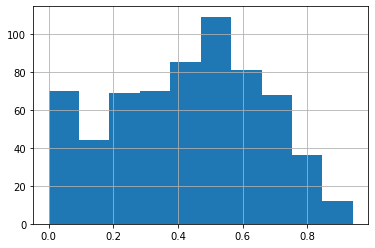

In [43]:
df_first_of_species['r_squared_ols'].hist()
plt.show()

In [44]:
df_first_of_species_significant = df_first_of_species[df_first_of_species['r_squared_ols'] >= 0.5]

# df_first_of_species_significant = df_first_of_species[df_first_of_species['p_value_ols'] <= 0.05]

In [45]:
print('len(df_first_of_species_significant) =', len(df_first_of_species_significant))

len(df_first_of_species_significant) = 276


In [46]:
df_first_of_species_significant.head(2)

,grid_cell,slope_first_of_season_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,19,-1.821978,3738.087912,0.516131,0.003798,71.357143,10.609192,25,27,-83,-81,25,26.0,-82.0,chwwid
1,20,-6.057783,12235.295991,0.551968,0.021817,31.555556,27.982634,25,27,-81,-79,25,26.0,-80.0,chwwid


In [47]:
field_name = 'slope_first_of_season_ols'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 644
len(df_merged['species_code'].unique()) = 11


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


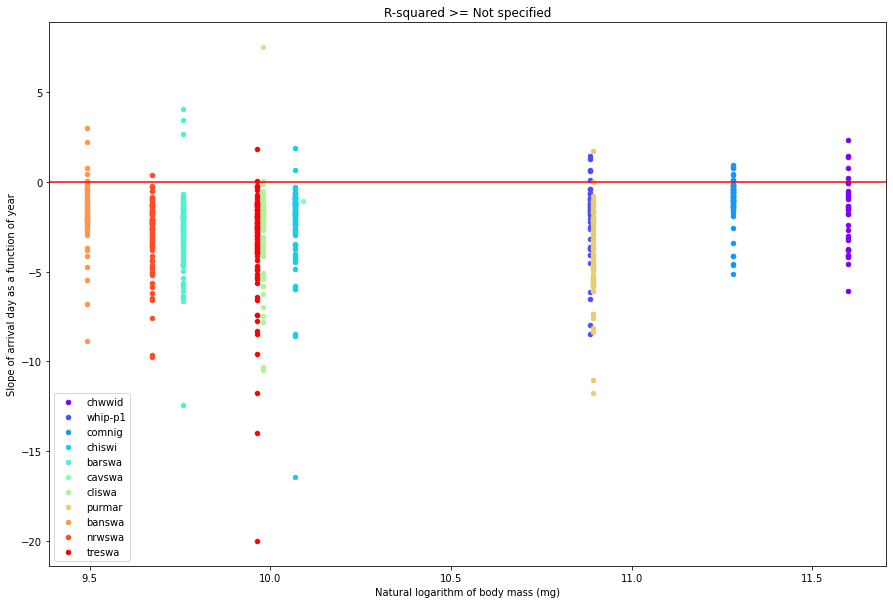

In [48]:
r_squared = 'Not specified'
df_first_of_species_merged = plot_slopes(df_first_of_species, field_name, predictor_variable, r_squared)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 276
len(df_merged['species_code'].unique()) = 10


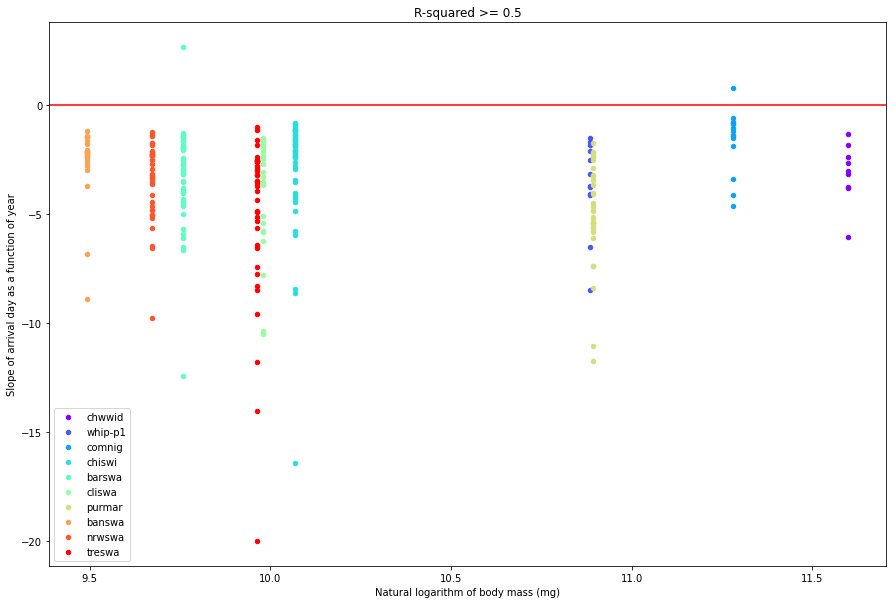

In [49]:
r_squared = 0.5
df_first_of_species_merged = plot_slopes(df_first_of_species_significant, field_name, predictor_variable, 
                                         r_squared)

In [50]:
# df_first_of_species.plot('min_lat', 'slope_first_of_season_ols', kind='scatter')
# plt.show()

In [51]:
# df_first_of_species[df_first_of_species['species_code'] == 'purmar'].sort_values(by='slope_first_of_season', 
#                                                                                  ascending=False)

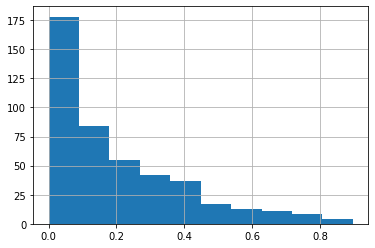

In [52]:
df_mean_min_r_squared_species['r_squared_ols'].hist()
plt.show()

In [53]:
r_squared = 0.5

df_mean_min_r_squared_species_significant = df_mean_min_r_squared_species[
    df_mean_min_r_squared_species['r_squared_ols'] >= r_squared]
df_mean_mean_r_squared_species_significant = df_mean_mean_r_squared_species[
    df_mean_mean_r_squared_species['r_squared_ols'] >= r_squared]
df_mean_std_mean_r_squared_species_significant = df_mean_std_mean_r_squared_species[
    df_mean_std_mean_r_squared_species['r_squared_ols'] >= r_squared]

# p_value = 0.05

# df_mean_min_r_squared_species_significant = df_mean_min_r_squared_species[
#     df_mean_min_r_squared_species['p_value_ols'] <= p_value]
# df_mean_mean_r_squared_species_significant = df_mean_mean_r_squared_species[
#     df_mean_mean_r_squared_species['p_value_ols'] <= p_value]
# df_mean_std_mean_r_squared_species_significant = df_mean_std_mean_r_squared_species[
#     df_mean_std_mean_r_squared_species['p_value_ols'] <= p_value]

In [54]:
print('len(df_mean_min_r_squared_species_significant) =', len(df_mean_min_r_squared_species_significant))
print('len(df_mean_mean_r_squared_species_significant) =', len(df_mean_mean_r_squared_species_significant))
print('len(df_mean_std_mean_r_squared_species_significant) =', len(df_mean_std_mean_r_squared_species_significant))

len(df_mean_min_r_squared_species_significant) = 42
len(df_mean_mean_r_squared_species_significant) = 10
len(df_mean_std_mean_r_squared_species_significant) = 5


In [55]:
df_mean_min_r_squared_species_significant.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,90,-4.377059,8921.612151,0.539055,0.157774,93.958979,11.467451,35,37,-81,-79,35,36.0,-80.0,whip-p1
3,121,-2.185895,4510.089719,0.844441,0.001252,104.419318,5.826666,39,41,-75,-73,40,40.0,-74.0,whip-p1


In [56]:
df_mean_mean_r_squared_species_significant.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,20,1.264017,-2450.242995,0.575291,0.080454,98.646348,3.117762,25,27,-81,-79,25,26.0,-80.0,chiswi
26,128,0.515218,-920.747893,0.549962,0.014085,117.159445,2.103443,41,43,-89,-87,45,42.0,-88.0,chiswi


In [57]:
df_mean_std_mean_r_squared_species_significant.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,-0.753160,1615.890239,0.583421,0.132795,97.068585,2.044703,27,29,-83,-81,30,28.0,-82.0,chiswi
3,117,-2.455312,5061.554710,0.864816,0.022018,109.189635,4.174599,39,41,-83,-81,40,40.0,-82.0,barswa


In [58]:
field_name = 'slope_ols'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 449
len(df_merged['species_code'].unique()) = 10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


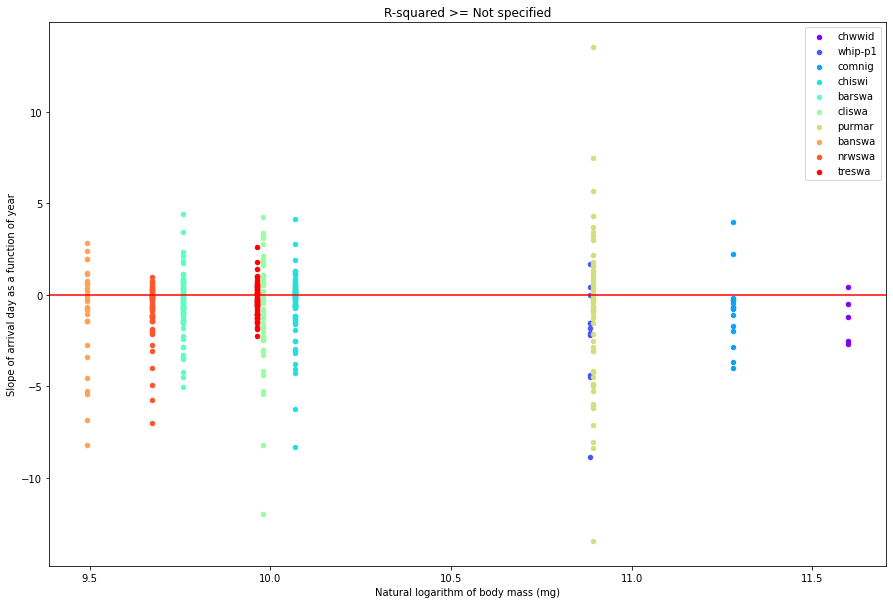

In [59]:
r_squared = 'Not specified'
df_mean_min_r_squared_species_merged = plot_slopes(df_mean_min_r_squared_species, field_name, predictor_variable, 
                                                   r_squared)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 42
len(df_merged['species_code'].unique()) = 9


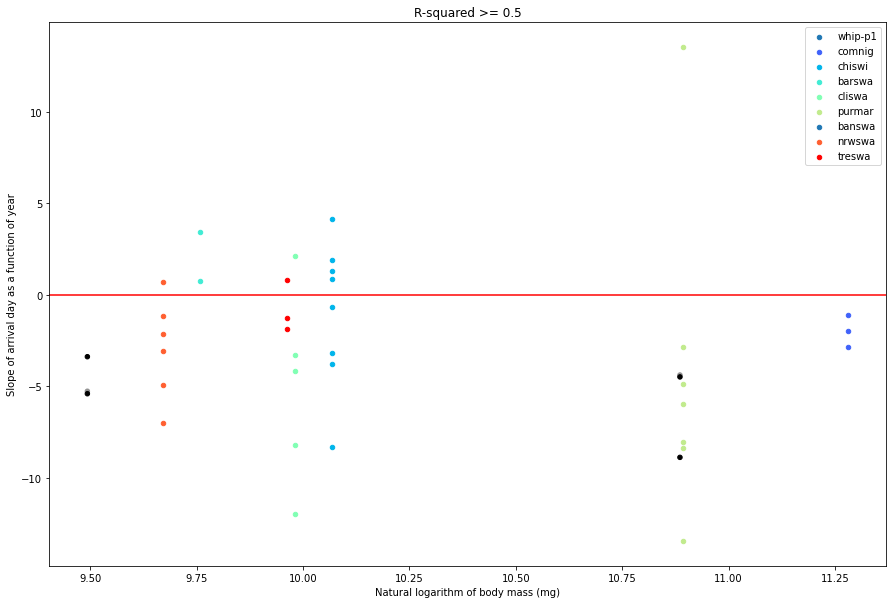

In [60]:
r_squared = 0.5
df_mean_min_r_squared_species_merged = plot_slopes(df_mean_min_r_squared_species_significant, field_name, 
                                                   predictor_variable, r_squared)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 154
len(df_merged['species_code'].unique()) = 8


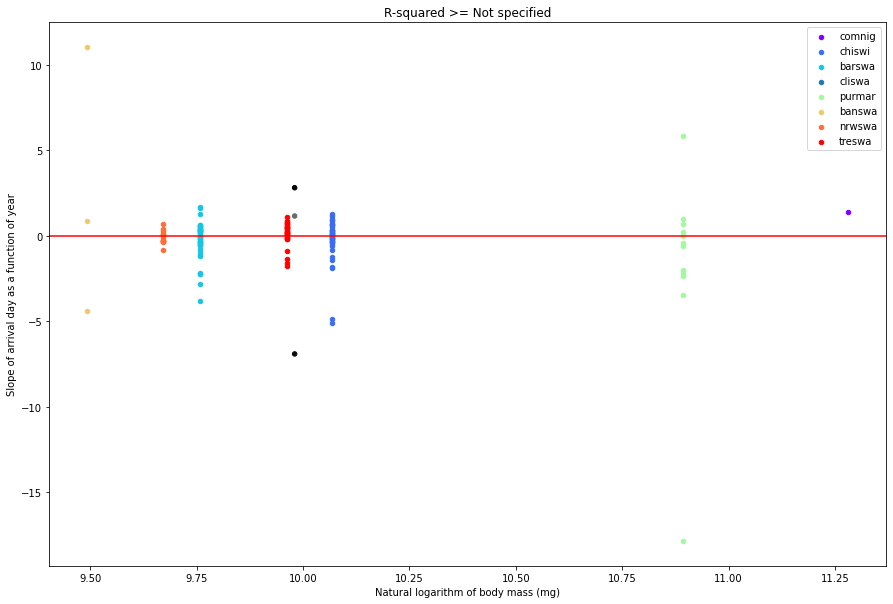

In [61]:
r_squared = 'Not specified'
df_mean_mean_r_squared_species_merged = plot_slopes(df_mean_mean_r_squared_species, field_name, 
                                                    predictor_variable, r_squared)

In [79]:
df_mean_mean_r_squared_species.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,1.364818,-2644.402385,0.257192,0.383147,108.434652,4.255158,27,29,-83,-81,30,28.0,-82.0,comnig
0,20,1.264017,-2450.242995,0.575291,0.080454,98.646348,3.117762,25,27,-81,-79,25,26.0,-80.0,chiswi


In [83]:
for species in ['chiswi', 'barswa', 'cliswa', 'purmar', 'banswa', 'nrwswa']:
# for species in list(df_mean_mean_r_squared_species['species_code'].unique()):
    print(species)
    print(len(df_mean_mean_r_squared_species[df_mean_mean_r_squared_species['species_code'] == species]))
    print(df_mean_mean_r_squared_species[
        df_mean_mean_r_squared_species['species_code'] == species]['slope_ols'].mean())
    print(df_mean_mean_r_squared_species[
    df_mean_mean_r_squared_species['species_code'] == species]['slope_ols'].var())
    print(df_mean_mean_r_squared_species[
    df_mean_mean_r_squared_species['species_code'] == species]['slope_ols'].std())

chiswi
41
-0.2557770234249229
1.688196632219927
1.299306211876141
barswa
46
-0.22770513797861786
1.134968306366706
1.065348912970162
cliswa
4
-0.6353525745009283
18.55054127470674
4.307033930062166
purmar
12
-1.7698787655747779
31.309544719602197
5.59549325078694
banswa
3
2.50688104291112
61.68802412828293
7.854172402505749
nrwswa
15
-0.09783987067369036
0.1357414733682574
0.36843109717864125


In [84]:
for species in ['chiswi', 'barswa', 'purmar']:
# for species in list(df_mean_std_mean_r_squared_species['species_code'].unique()):
    print(species)
    print(len(df_mean_std_mean_r_squared_species[
        df_mean_std_mean_r_squared_species['species_code'] == species]))
    print(df_mean_std_mean_r_squared_species[
        df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].mean())
    print(df_mean_std_mean_r_squared_species[
    df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].var())
    print(df_mean_std_mean_r_squared_species[
    df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].std())

chiswi
13
-0.0008426701698408448
0.17894199089498644
0.4230153553891235
barswa
19
-0.6527979105159608
2.046616984766347
1.430600218358136
purmar
2
-2.2584775230654275
3.390517533312116
1.841335801344262


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 10
len(df_merged['species_code'].unique()) = 6


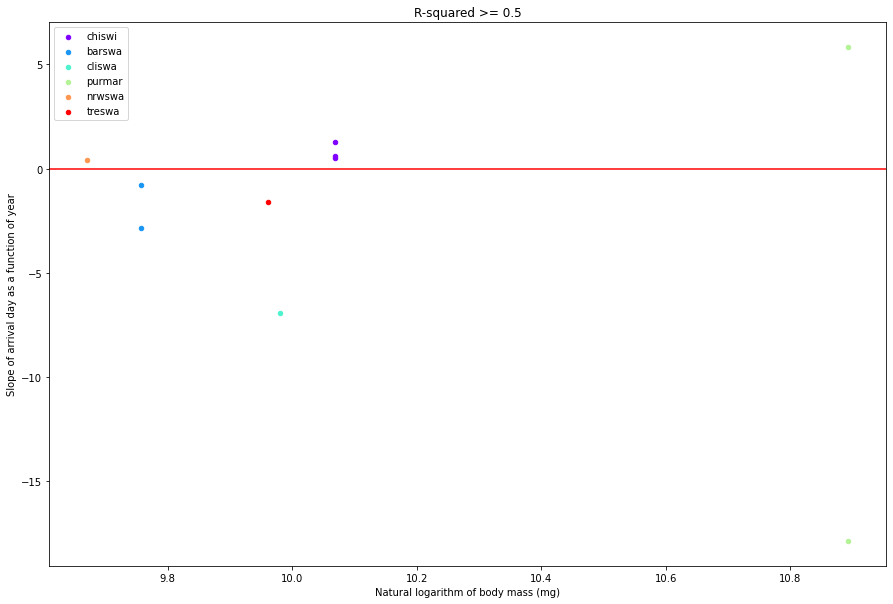

In [62]:
r_squared = 0.5
df_mean_mean_r_squared_species_merged = plot_slopes(df_mean_mean_r_squared_species_significant, field_name, 
                                                    predictor_variable, r_squared)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

len_df_merged_before = 41
len(df_merged['species_code'].unique()) = 4


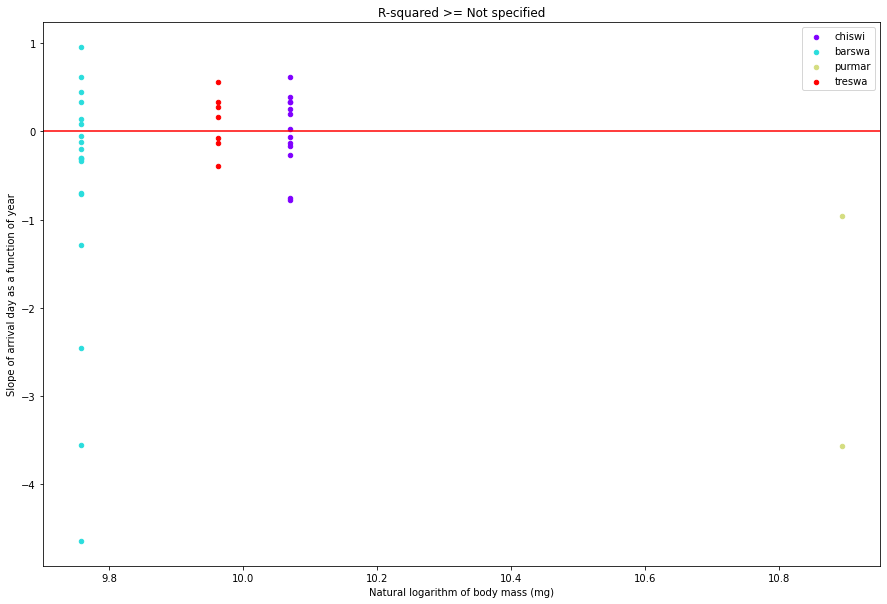

In [63]:
r_squared = 'Not specified'
df_mean_std_mean_r_squared_species_merged = plot_slopes(df_mean_std_mean_r_squared_species, field_name, 
                                                        predictor_variable, r_squared)

In [65]:
df_mean_std_mean_r_squared_species.head(2)

,grid_cell,slope_ols,intercept_ols,r_squared_ols,p_value_ols,mean_day,std_day,min_lat,max_lat,min_lon,max_lon,lat_band,mean_lat,mean_lon,species_code
0,33,-0.75316,1615.890239,0.583421,0.132795,97.068585,2.044703,27,29,-83,-81,30,28.0,-82.0,chiswi
1,74,0.33160,-569.679696,0.223716,0.421052,99.024573,1.453786,33,35,-85,-83,35,34.0,-84.0,chiswi


In [66]:
df_mean_std_mean_r_squared_species['species_code'].unique()

array(['chiswi', 'barswa', 'purmar', 'treswa'], dtype=object)

In [84]:
for species in ['chiswi', 'barswa', 'purmar']:
# for species in list(df_mean_std_mean_r_squared_species['species_code'].unique()):
    print(species)
    print(len(df_mean_std_mean_r_squared_species[
        df_mean_std_mean_r_squared_species['species_code'] == species]))
    print(df_mean_std_mean_r_squared_species[
        df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].mean())
    print(df_mean_std_mean_r_squared_species[
    df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].var())
    print(df_mean_std_mean_r_squared_species[
    df_mean_std_mean_r_squared_species['species_code'] == species]['slope_ols'].std())

chiswi
13
-0.0008426701698408448
0.17894199089498644
0.4230153553891235
barswa
19
-0.6527979105159608
2.046616984766347
1.430600218358136
purmar
2
-2.2584775230654275
3.390517533312116
1.841335801344262


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


len_df_merged_before = 5
len(df_merged['species_code'].unique()) = 2


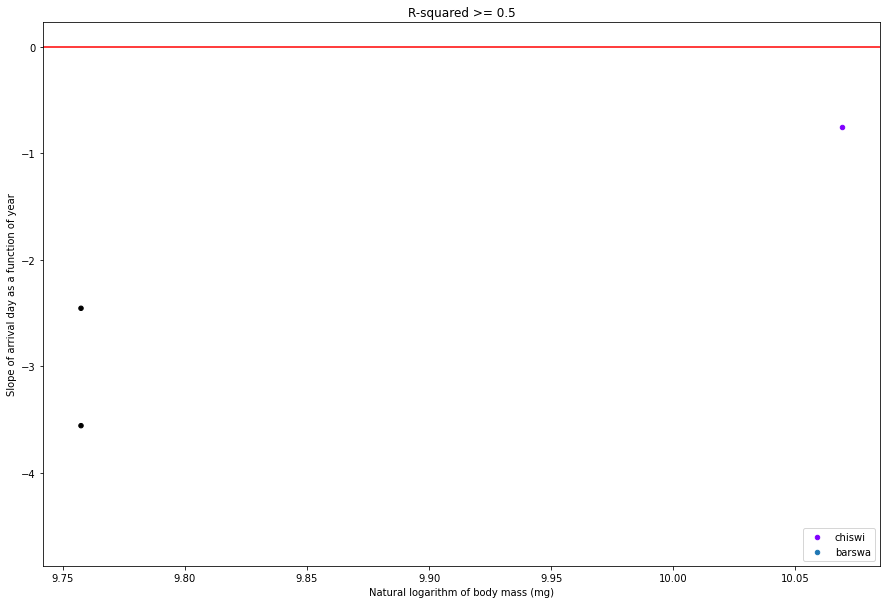

In [64]:
#

r_squared = 0.5
df_mean_std_mean_r_squared_species_merged = plot_slopes(df_mean_std_mean_r_squared_species_significant, 
                                                        field_name, predictor_variable, r_squared)

In [ ]:
len(df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'barswa'])

In [ ]:
len(df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'treswa'])

In [ ]:
len(df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'chiswi'])

In [ ]:
len(df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'purmar'])

In [ ]:
df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'barswa'].sort_values(by='slope_ols')

In [ ]:
df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'treswa'].sort_values(by='slope_ols')

In [ ]:
df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'chiswi'].sort_values(by='slope_ols')

In [ ]:
df_mean_std_mean_r_squared_species_merged[
    df_mean_std_mean_r_squared_species_merged['species_code'] == 'purmar'].sort_values(by='slope_ols')

In [ ]:
# df_comp_species = df_first_of_species[['grid_cell', 'slope_first_of_season', 'species_code']].merge(
#     df_mean_min_r_squared_species[['grid_cell', 'slope_mean', 'species_code']], 
#     on=['grid_cell', 'species_code'])

# print('len(df_comp_species):', len(df_comp_species))

# if len(df_comp_species) > 0:
#     df_comp_species.plot('slope_mean', 'slope_first_of_season', kind='scatter')
#     plt.show()

In [ ]:
start_year = '2002'

species = 'treswa'
# species = 'barswa'
# species = 'chiswi'

sampled = 1

random_state = 1

df_first_of_sampled_random_states = pd.DataFrame()
df_r_first_of_sampled_random_states = pd.DataFrame()

for species in ['treswa', 'barswa', 'chiswi']:

    sampled = 1

    for random_state in range(1, 6):
        
        ###

        df_first_of_sampled, df_grid_cells_sampled, df_r_first_of_sampled = main_function(
            species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states, 
            random_state)

        df_first_of_sampled['species_code'] = species

        df_first_of_sampled['random_state'] = random_state
        df_r_first_of_sampled['random_state'] = random_state

        df_first_of_sampled_random_states = df_first_of_sampled_random_states.append(df_first_of_sampled)
        df_r_first_of_sampled_random_states = df_r_first_of_sampled_random_states.append(
            df_r_first_of_sampled)

In [ ]:
df_first_of_not_sampled_species = pd.DataFrame()
df_r_first_of_not_sampled_species = pd.DataFrame()

for species in ['treswa', 'barswa', 'chiswi']:

    sampled = 0
    
    ###

    df_first_of_not_sampled, df_grid_cells_not_sampled, df_r_first_of_not_sampled = main_function(
        species, start_date, end_date, start_year, end_year, month, year, sampled, countries_states)
    
    df_first_of_not_sampled['species_code'] = species
    
    df_first_of_not_sampled_species = df_first_of_not_sampled_species.append(df_first_of_not_sampled)
    df_r_first_of_not_sampled_species = df_r_first_of_not_sampled_species.append(
        df_r_first_of_not_sampled)
    
    ###

    # df_mean, df_first_of, df_grid_cells, df_r_first_of, list_df_r_mean, list_df_r_comp = main_function(
    #     species, start_date, end_date, month, year, countries_states)

In [ ]:
# df_first_of_sampled_random_states.head(2)

In [ ]:
df_mean_first_of_sampled = df_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'year', 'first_of_season_arrival_day']].groupby(
    ['species_code', 'grid_cell', 'year']).mean()
df_mean_first_of_sampled = df_mean_first_of_sampled.rename(
    columns={'first_of_season_arrival_day': 'mean_first_of_season_arrival_day'})

df_var_first_of_sampled = df_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'year', 'first_of_season_arrival_day']].groupby(
    ['species_code', 'grid_cell', 'year']).var()
df_var_first_of_sampled = df_var_first_of_sampled.rename(
    columns={'first_of_season_arrival_day': 'variance_first_of_season_arrival_day'})

df_std_first_of_sampled = df_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'year', 'first_of_season_arrival_day']].groupby(
    ['species_code', 'grid_cell', 'year']).std()
df_std_first_of_sampled = df_std_first_of_sampled.rename(
    columns={'first_of_season_arrival_day': 'standard_deviation_first_of_season_arrival_day'})

df_stats_first_of_sampled = df_mean_first_of_sampled.merge(
    df_var_first_of_sampled, left_index=True, right_index=True).merge(
    df_std_first_of_sampled, left_index=True, right_index=True)
df_stats_first_of_sampled = df_stats_first_of_sampled.reset_index()

In [ ]:
# df_mean_first_of_sampled.head(2)

In [ ]:
# df_var_first_of_sampled.head(2)

In [ ]:
# df_std_first_of_sampled.head(2)

In [ ]:
df_stats_first_of_sampled.head(2)

In [ ]:
df_first_of_not_sampled_species.head(2)

In [ ]:
# df_r_first_of_sampled_random_states.head(2)

In [ ]:
df_mean_slopes_first_of_sampled = df_r_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'slope_first_of_season_ols']].groupby(['species_code', 'grid_cell']).mean()
df_mean_slopes_first_of_sampled = df_mean_slopes_first_of_sampled.rename(
    columns={'slope_first_of_season_ols': 'mean_slope_first_of_season'})

df_var_slopes_first_of_sampled = df_r_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'slope_first_of_season_ols']].groupby(['species_code', 'grid_cell']).var()
df_var_slopes_first_of_sampled = df_var_slopes_first_of_sampled.rename(
    columns={'slope_first_of_season_ols': 'variance_slope_first_of_season'})

df_std_slopes_first_of_sampled = df_r_first_of_sampled_random_states[
    ['species_code', 'grid_cell', 'slope_first_of_season_ols']].groupby(['species_code', 'grid_cell']).std()
df_std_slopes_first_of_sampled = df_std_slopes_first_of_sampled.rename(
    columns={'slope_first_of_season_ols': 'standard_deviation_slope_first_of_season'})

df_stats_slopes_first_of_sampled = df_mean_slopes_first_of_sampled.merge(
    df_var_slopes_first_of_sampled, left_index=True, right_index=True).merge(
    df_std_slopes_first_of_sampled, left_index=True, right_index=True)
df_stats_slopes_first_of_sampled = df_stats_slopes_first_of_sampled.reset_index()

In [ ]:
# df_mean_slopes_first_of_sampled.head(2)

In [ ]:
# df_var_slopes_first_of_sampled.head(2)

In [ ]:
# df_std_slopes_first_of_sampled.head(2)

In [ ]:
df_stats_slopes_first_of_sampled

In [ ]:
df_r_first_of_not_sampled_species

In [ ]:
subdir = 'Elske/'
filename = 'pheno_all.csv'

df_insects = pd.read_csv(subdir + filename)

print(len(df_insects))

In [ ]:
df_insects = df_insects.rename(columns={'body_size_mg': 'body_mass_mg'})
df_insects['log_body_mass_mg'] = np.log(df_insects['body_mass_mg'])

In [ ]:
df_insects.head(2)

In [ ]:
df_first_of_species_merged.head(2)

In [ ]:
df_insects_fewer_cols = df_insects[['state', 'scientific_name', 'common_name', 'body_mass_mg', 'log_body_mass_mg', 
                                    'slope_year']]
df_insects_fewer_cols = df_insects_fewer_cols.rename(columns={'state': 'location'})
df_insects_fewer_cols = df_insects_fewer_cols.rename(columns={'slope_year': 'slope_arrival_day_year'})
df_insects_fewer_cols['log_body_mass_mg'] = np.log(df_insects_fewer_cols['body_mass_mg'])

In [ ]:
df_first_of_species_fewer_cols = df_first_of_species_merged[[
    'grid_cell', 'scientific_name', 'common_name', 'body_mass_mg', 'log_body_mass_mg', 'slope_first_of_season']]
df_first_of_species_fewer_cols = df_first_of_species_fewer_cols.rename(columns={'grid_cell': 'location'})
df_first_of_species_fewer_cols = df_first_of_species_fewer_cols.rename(
    columns={'slope_first_of_season': 'slope_arrival_day_year'})

In [ ]:
df_insects_fewer_cols.head(2)

In [ ]:
df_first_of_species_fewer_cols.head(2)

In [ ]:
df_first_of_migratory_o_a_i_insects = df_first_of_species_fewer_cols.append(df_insects_fewer_cols)

In [ ]:
len(df_first_of_migratory_o_a_i_insects)

In [ ]:
assert(len(df_first_of_migratory_o_a_i_insects == len(df_first_of_species_fewer_cols) + len(df_insects_fewer_cols)))

In [ ]:
df_first_of_migratory_o_a_i_insects = df_first_of_migratory_o_a_i_insects.sort_values(by='body_mass_mg', 
                                                                                      ascending=False)

In [ ]:
df_first_of_migratory_o_a_i_insects.head(2)

In [ ]:
def plot_slopes_across_taxa(df):
    
    print(len(df['common_name'].unique()))
    
    color_values = matplotlib.cm.rainbow(np.linspace(0, 1, len(df['common_name'].unique())))
    colors = dict(zip(df['common_name'].unique(), color_values))
    
    body_mass_field_name = 'log_body_mass_mg'
#     body_mass_field_name = 'body_mass_mg'

    fig, ax = plt.subplots()

    for species in list(df['common_name'].unique()):
        df_subset = df[df['common_name'] == species]
        df_subset.plot(ax=ax, kind='scatter', x=body_mass_field_name, y='slope_arrival_day_year', label=species, 
                       color=colors[species], figsize=(15,10))
    
#     plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Natural logarithm of body mass (mg)')
    plt.ylabel('Slope of arrival day as a function of year')
    plt.show()

In [ ]:
plot_slopes_across_taxa(df_first_of_migratory_o_a_i_insects)

In [ ]:
# os.system("printf '\a'")

Slope?
Residuals?